<h1> And Gate With Keras</h1>  

<h4>reference : https://github.com/dalek7/Undergrad-AI-2020SPring/blob/master/05_SVM_simple.ipynb</h4>


In [1]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_data = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 5], [9, 4], [8, 2]]) #training_points
y_data = [1, 1, 1, 1, 0, 0, 0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

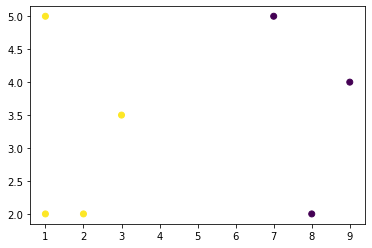

In [3]:

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [5]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [6]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_and.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [9]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500) #epoch 8회차부터 정확도가 1에 수렴하며 손실함수가 잘 감소하고 있다.

Epoch 1/500
7/7 [==============================] - 0s 736us/step - loss: 0.7453 - accuracy: 0.5714
Epoch 2/500
7/7 [==============================] - 0s 571us/step - loss: 0.7051 - accuracy: 0.5714
Epoch 3/500
7/7 [==============================] - 0s 428us/step - loss: 0.6824 - accuracy: 0.5714
Epoch 4/500
7/7 [==============================] - 0s 571us/step - loss: 0.6504 - accuracy: 0.5714
Epoch 5/500
7/7 [==============================] - 0s 571us/step - loss: 0.5962 - accuracy: 0.7143
Epoch 6/500
7/7 [==============================] - 0s 770us/step - loss: 0.5088 - accuracy: 1.0000
Epoch 7/500
7/7 [==============================] - 0s 571us/step - loss: 0.4338 - accuracy: 1.0000
Epoch 8/500
7/7 [==============================] - 0s 611us/step - loss: 0.4394 - accuracy: 0.8571
Epoch 9/500
7/7 [==============================] - 0s 716us/step - loss: 0.4131 - accuracy: 0.8571
Epoch 10/500
7/7 [==============================] - 0s 428us/step - loss: 0.3442 - accuracy: 0.8571
Epoch 11/

Text(0.5, 0, 'epoch')

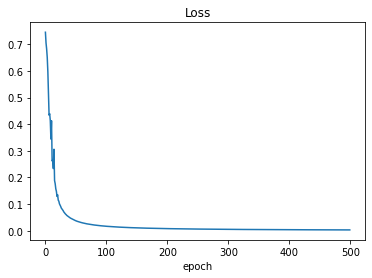

In [10]:
plt.plot(history.history['loss']) #도중에 손실함수 하향곡선에 양간의 노이즈가 낀 현상(초반) 이 보이지만 손실함수 하강이 잘 이루어지고 있다.
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

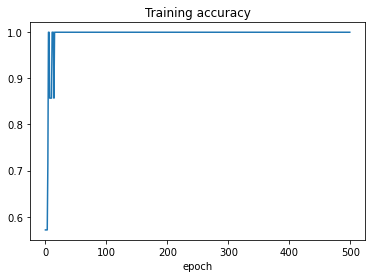

In [11]:
plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

In [12]:
hypothesis = model.predict(x_data)
print(hypothesis)

[[0.9978494 ]
 [0.99789816]
 [0.99612427]
 [0.99768406]
 [0.00404352]
 [0.00323573]
 [0.00323576]]


In [13]:
predicted = hypothesis > 0.5
print(predicted)

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
